Plot the data table on Statistics Canada using Python. 

Source: 
- Working from home during the COVID-19 pandemic: How rates in Canada and the United States compare, https://www150.statcan.gc.ca/n1/pub/36-28-0001/2022008/article/00001-eng.htm
- Labor force, total - Canada, United States, https://data.worldbank.org/indicator/SL.TLF.TOTL.IN?end=2022&locations=CA-US&start=1991&view=chart
- Labor force, female (% of total labor force) - Canada, https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?end=2022&locations=CA&start=1991&view=chart

In [ ]:
!pip3 install pandas
!pip3 install matplotlib

In [2]:
# convert num to string, add , after every 3rd digit from the right
def num_to_str(num):
		num = str(num)
		num = num[::-1]
		num = ','.join([num[i:i+3] for i in range(0, len(num), 3)])
		num = num[::-1]
		return num

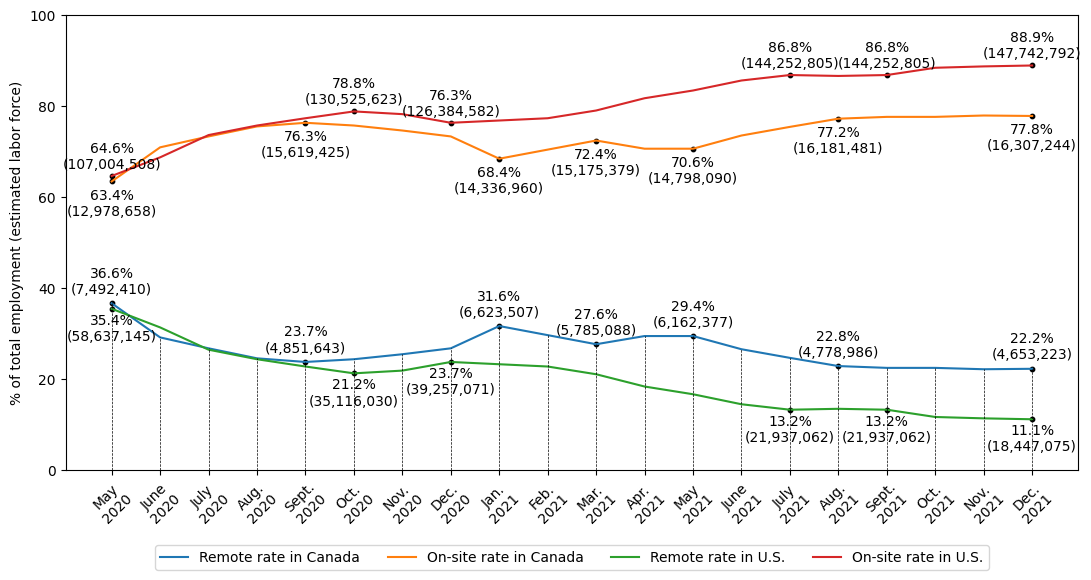

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

labor_force_total_ca_2020 = 20471068
labor_force_total_ca_2021 = 20960467
labor_force_total_us_2020 = 165641653
labor_force_total_us_2021 = 166189867

# Read data from CSV, the data contains white spaces and tabs, trim them
df = pd.read_csv('data/percentage-of-employees-working-from-home-canada-and-us.csv', skipinitialspace=True)

# Convert 'Year' and 'Month' columns to 'AbbrMonth-Year' column
df['Month'] = df['Month'].map(str) + '\n' + df['Year'].map(str)

# Calculate on-site rate
df['On-Site-Canada'] = 100 - df['Canada']
df['On-Site-US'] = 100 - df['United States']

# Plotting
plt.figure(figsize=(11, 6))
plt.plot(df['Month'], df['Canada'], label='Remote rate in Canada')
plt.plot(df['Month'], df['On-Site-Canada'], label='On-site rate in Canada')

plt.plot(df['Month'], df['United States'], label='Remote rate in U.S.')
plt.plot(df['Month'], df['On-Site-US'], label='On-site rate in U.S.')

# Adding text labels
sample_ca = [0, 4, 8, 19, 10, 12, 15]
sample_us = [0, 5, 19, 7, 14, 16]
for index, row in df.iterrows():
	if row['Year'] == 2020:
		appr_ca = int(row['Canada'] * labor_force_total_ca_2020 / 100)
		appr_ca_onsite = labor_force_total_ca_2020 - appr_ca
		appr_us = int(row['United States'] * labor_force_total_us_2020 / 100)
		appr_us_onsite = labor_force_total_us_2020 - appr_us
	elif row['Year'] == 2021:
		appr_ca = int(row['Canada'] * labor_force_total_ca_2021 / 100)
		appr_ca_onsite = labor_force_total_ca_2021 - appr_ca
		appr_us = int(row['United States'] * labor_force_total_us_2021 / 100)
		appr_us_onsite = labor_force_total_us_2021 - appr_us
	if index in sample_ca:
		plt.text(row['Month'], row['Canada'] + 1.5, f"{row['Canada']:.1f}%\n({num_to_str(appr_ca)})", ha='center', va='bottom')
		plt.scatter(row['Month'], row['Canada'], s=10, c='black')
		# on-site
		plt.text(row['Month'], row['On-Site-Canada'] - 1.5, f"{row['On-Site-Canada']:.1f}%\n({num_to_str(appr_ca_onsite)})", ha='center', va='top')
		plt.scatter(row['Month'], row['On-Site-Canada'], s=10, c='black')
	if index in sample_us:
		plt.text(row['Month'], row['United States'] - 1, f"{row['United States']:.1f}%\n({num_to_str(appr_us)})", ha='center', va='top')
		plt.scatter(row['Month'], row['United States'], s=10, c='black')
		# on-site
		plt.text(row['Month'], row['On-Site-US'] + 1, f"{row['On-Site-US']:.1f}%\n({num_to_str(appr_us_onsite)})", ha='center', va='bottom')
		plt.scatter(row['Month'], row['On-Site-US'], s=10, c='black')
	# plot a dash line vertically from the point to the x-axis
	plt.plot([row['Month'], row['Month']], [0, row['Canada']], 'k--', lw=0.5)

# add title with font size 40, bold, New Times Roman, add 10px margin to the bottom
plt.title('', fontsize=40, fontweight='bold', fontname='Times New Roman', pad=30)
plt.xlabel('')
plt.ylabel('% of total employment (estimated labor force)')
# plot the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
# plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

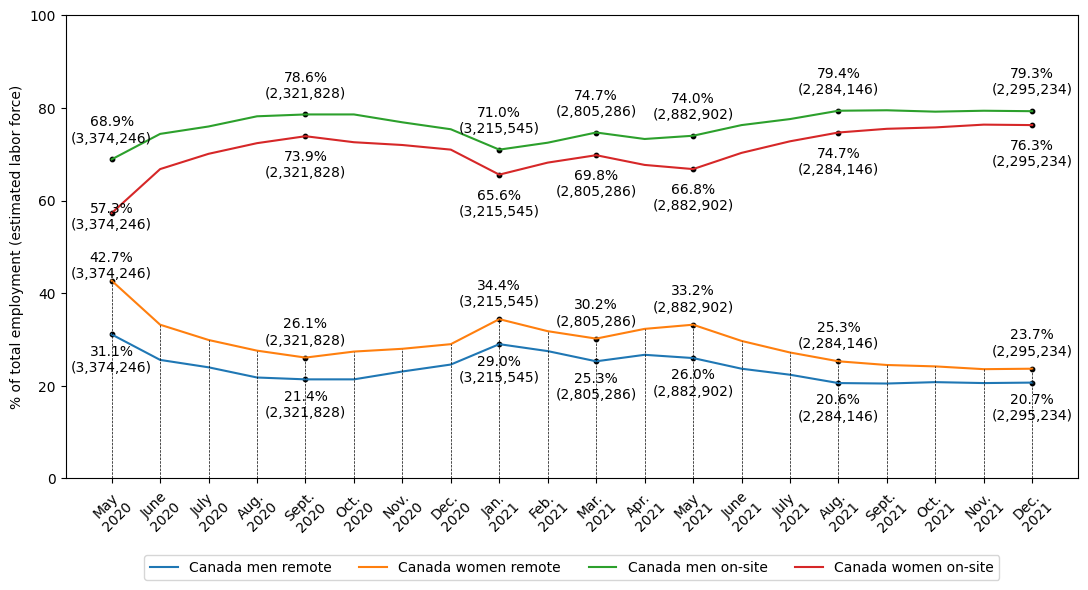

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

labor_force_total_ca_2020 = 20471068
labor_force_female_percent_ca_2020 = 47
labor_force_female_ca_2020 = int(labor_force_total_ca_2020 * labor_force_female_percent_ca_2020 / 100)
labor_force_male_ca_2020 = labor_force_total_ca_2020 - labor_force_female_ca_2020

labor_force_total_ca_2021 = 20960467
labor_force_female_percent_ca_2021 = 47.1
labor_force_female_ca_2021 = int(labor_force_total_ca_2021 * labor_force_female_percent_ca_2021 / 100)
labor_force_male_ca_2021 = labor_force_total_ca_2021 - labor_force_female_ca_2021

labor_force_total_us_2020 = 165641653
labor_force_female_percent_us_2020 = 46.1
labor_force_female_us_2020 = int(labor_force_total_us_2020 * labor_force_female_percent_us_2020 / 100)
labor_force_male_us_2020 = labor_force_total_us_2020 - labor_force_female_us_2020

labor_force_total_us_2021 = 166189867
labor_force_female_percent_us_2021 = 46.1
labor_force_female_us_2021 = int(labor_force_total_us_2021 * labor_force_female_percent_us_2021 / 100)
labor_force_male_us_2021 = labor_force_total_us_2021 - labor_force_female_us_2021

# Read data from CSV, the data contains white spaces and tabs, trim them
df = pd.read_csv('data/percentage-of-employees-working-from-home-canada-and-us.csv', skipinitialspace=True)

# Convert 'Year' and 'Month' columns to 'AbbrMonth-Year' column
df['Month'] = df['Month'].map(str) + '\n' + df['Year'].map(str)

# Calculate on-site rate
df['On-Site-Canada-Men'] = 100 - df['Canada men']
df['On-Site-Canada-Women'] = 100 - df['Canada women']
df['On-Site-US-Men'] = 100 - df['U.S. men']
df['On-Site-US-Women'] = 100 - df['U.S. women']

# Plotting
plt.figure(figsize=(11, 6))
plt.plot(df['Month'], df['Canada men'], label='Canada men remote')
plt.plot(df['Month'], df['Canada women'], label='Canada women remote')
plt.plot(df['Month'], df['On-Site-Canada-Men'], label='Canada men on-site')
plt.plot(df['Month'], df['On-Site-Canada-Women'], label='Canada women on-site')

# plt.plot(df['Month'], df['U.S. men'], label='U.S. men remote')
# plt.plot(df['Month'], df['U.S. women'], label='U.S. women remote')
# plt.plot(df['Month'], df['On-Site-US-Men'], label='U.S. men on-site')
# plt.plot(df['Month'], df['On-Site-US-Women'], label='U.S. women on-site')

# Adding text labels
sample_ca = [0, 4, 8, 19, 10, 12, 15]
sample_us = [0, 5, 19, 7, 14, 16]
for index, row in df.iterrows():
	if row['Year'] == 2020:
		appr_ca_men = int(row['Canada men'] * labor_force_male_ca_2020 / 100)
		appr_ca_men_onsite = labor_force_male_ca_2020 - appr_ca_men
		
		appr_ca_women = int(row['Canada women'] * labor_force_female_ca_2020 / 100)
		appr_ca_women_onsite = labor_force_female_ca_2020 - appr_ca_women
	elif row['Year'] == 2021:
		appr_ca_men = int(row['Canada men'] * labor_force_male_ca_2021 / 100)
		appr_ca_men_onsite = labor_force_male_ca_2021 - appr_ca_men
		
		appr_ca_women = int(row['Canada women'] * labor_force_female_ca_2021 / 100)
		appr_ca_women_onsite = labor_force_female_ca_2021 - appr_ca_women
	if index in sample_ca:
		plt.text(row['Month'], row['Canada men'] - 2.2, f"{row['Canada men']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='top')
		plt.text(row['Month'], row['On-Site-Canada-Men'] + 3, f"{row['On-Site-Canada-Men']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')

		if index == 0:
			plt.text(row['Month'], row['On-Site-Canada-Women'] - 4, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
			plt.text(row['Month'], row['Canada women'], f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
		else:
			plt.text(row['Month'], row['On-Site-Canada-Women'] - 3, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='top')
			plt.text(row['Month'], row['Canada women'] + 2.2, f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
		
		plt.scatter(row['Month'], row['Canada men'], s=10, c='black')
		plt.scatter(row['Month'], row['On-Site-Canada-Men'], s=10, c='black')
		plt.scatter(row['Month'], row['On-Site-Canada-Women'], s=10, c='black')
		plt.scatter(row['Month'], row['Canada women'], s=10, c='black')

	# plot a dash line vertically from the point to the x-axis
	plt.plot([row['Month'], row['Month']], [0, row['Canada women']], 'k--', lw=0.5)

# add title with font size 40, bold, New Times Roman, add 10px margin to the bottom
plt.title('', fontsize=40, fontweight='bold', fontname='Times New Roman', pad=30)
plt.xlabel('')
plt.ylabel('% of total employment (estimated labor force)')
# plot the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
# plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

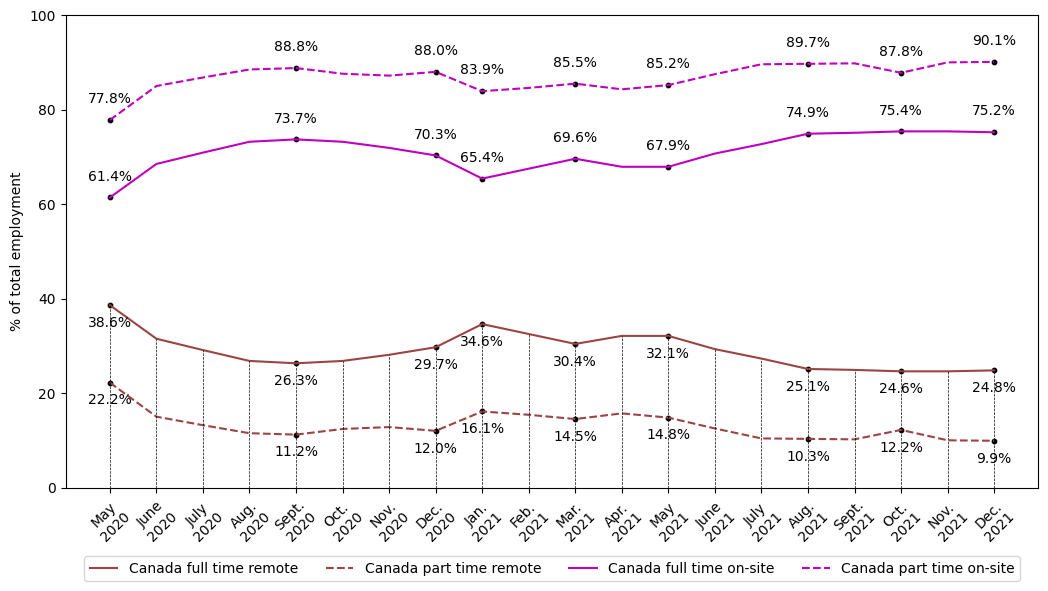

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV, the data contains white spaces and tabs, trim them
df = pd.read_csv('data/percentage-of-employees-working-from-home-by-work-status-canada-and-us.csv', skipinitialspace=True)

# Convert 'Year' and 'Month' columns to 'AbbrMonth-Year' column
df['Month'] = df['Month'].map(str) + '\n' + df['Year'].map(str)

# Calculate on-site rate
df['On-Site-Canada-ft'] = 100 - df['Canada full time']
df['On-Site-Canada-pt'] = 100 - df['Canada part time']
df['On-Site-US-ft'] = 100 - df['U.S. full time']
df['On-Site-US-pt'] = 100 - df['U.S. part time']

# Plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
plt.figure(figsize=(11, 6))
plt.plot(df['Month'], df['Canada full time'], label='Canada full time remote', linestyle='-', color='#9B4444')
plt.plot(df['Month'], df['Canada part time'], label='Canada part time remote', linestyle='--', color='#9B4444')
plt.plot(df['Month'], df['On-Site-Canada-ft'], label='Canada full time on-site', linestyle='-', color=colors[4])
plt.plot(df['Month'], df['On-Site-Canada-pt'], label='Canada part time on-site', linestyle='--', color=colors[4])
# plt.plot(df['Month'], df['U.S. full time'], label='U.S. full time remote', linestyle='-', color='b')
# plt.plot(df['Month'], df['U.S. part time'], label='U.S. part time remote', linestyle='--', color='b')
# plt.plot(df['Month'], df['On-Site-US-ft'], label='U.S. full time on-site', linestyle='-', color='g')
# plt.plot(df['Month'], df['On-Site-US-pt'], label='U.S. part time on-site', linestyle='--', color='g')

# Adding text labels
sample_ca = [0, 4, 7, 8, 19, 10, 12, 17, 15]
sample_us = [0, 5, 19, 7, 14, 16]
for index, row in df.iterrows():
	if index in sample_ca:

		plt.text(row['Month'], row['Canada full time'] - 2.2, f"{row['Canada full time']:.1f}%", ha='center', va='top')
		plt.text(row['Month'], row['On-Site-Canada-ft'] + 3, f"{row['On-Site-Canada-ft']:.1f}%", ha='center', va='bottom')

		plt.text(row['Month'], row['Canada part time'] - 2.2, f"{row['Canada part time']:.1f}%", ha='center', va='top')
		plt.text(row['Month'], row['On-Site-Canada-pt'] + 3, f"{row['On-Site-Canada-pt']:.1f}%", ha='center', va='bottom')


		plt.scatter(row['Month'], row['Canada full time'], s=10, c='black')
		plt.scatter(row['Month'], row['On-Site-Canada-ft'], s=10, c='black')
		plt.scatter(row['Month'], row['Canada part time'], s=10, c='black')
		plt.scatter(row['Month'], row['On-Site-Canada-pt'], s=10, c='black')

		# if index == 0:
		# 	plt.text(row['Month'], row['On-Site-Canada-Women'] - 4, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
		# 	plt.text(row['Month'], row['Canada women'], f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
		# else:
		# 	plt.text(row['Month'], row['On-Site-Canada-Women'] - 3, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='top')
		# 	plt.text(row['Month'], row['Canada women'] + 2.2, f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')

		# plot a dash line vertically from the point to the x-axis
	plt.plot([row['Month'], row['Month']], [0, row['Canada full time']], 'k--', lw=0.5)

# add title with font size 40, bold, New Times Roman, add 10px margin to the bottom
plt.title('', fontsize=40, fontweight='bold', fontname='Times New Roman', pad=30)
plt.xlabel('')
plt.ylabel('% of total employment')
# plot the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=4)
# plt.grid(True)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()